<a href="https://colab.research.google.com/github/FernandoSimon22/vision_artificial/blob/main/YOLOv8_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Jun  2 00:38:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 916, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {list(MODES)}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ['export', 'predict', 'val', 'benchmark', 'train', 'track'].

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ['pose', 'detect', 'obb', 'classify', 'segment']
                MODE (required) is one of ['export', 'predict', 'val', 'benchmark', 'train', 'track']
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
      

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lX9sE2RPQOCv2R7cn0io")
project = rf.workspace("jota22").project("am_boundingbox")
version = project.version(25)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AM_BoundingBox-25 in yolov8:: 100%|██████████| 422/422 [00:00<00:00, 6201.94it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/AM_BoundingBox-25/data.yaml epochs=200 imgsz=768 batch=16

100% 49.7M/49.7M [00:00<00:00, 303MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/AM_BoundingBox-25/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

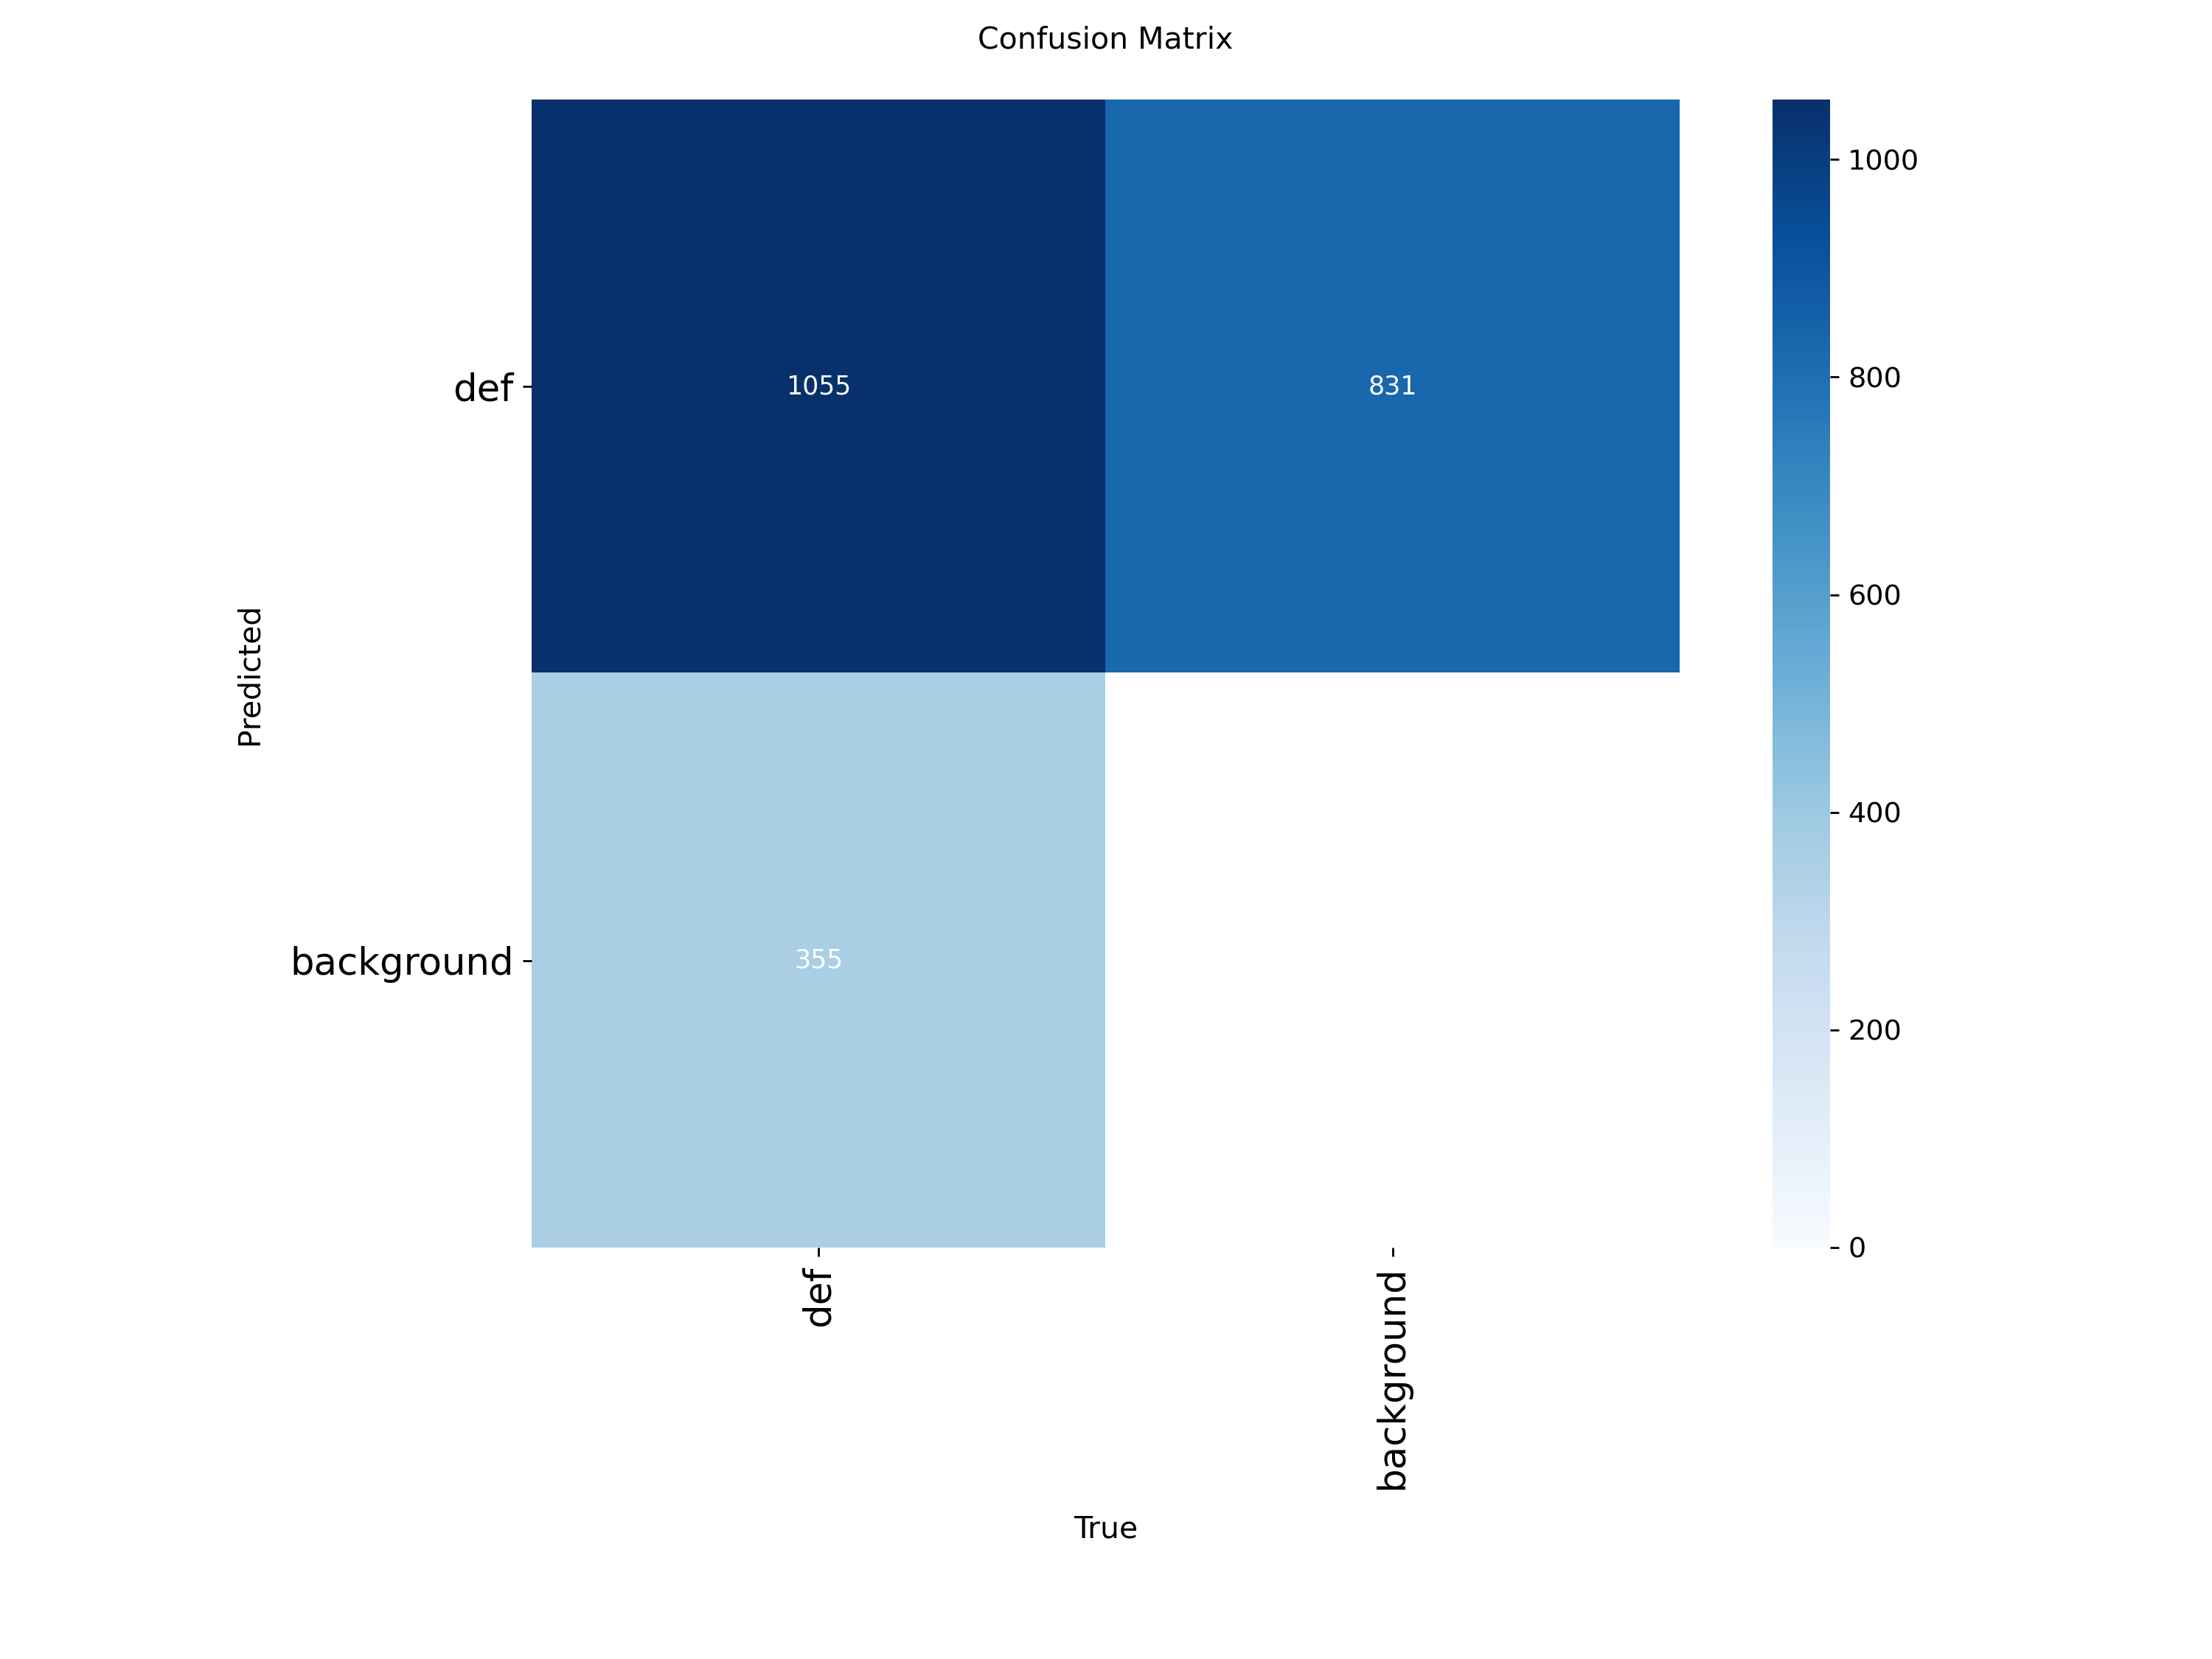

In [11]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

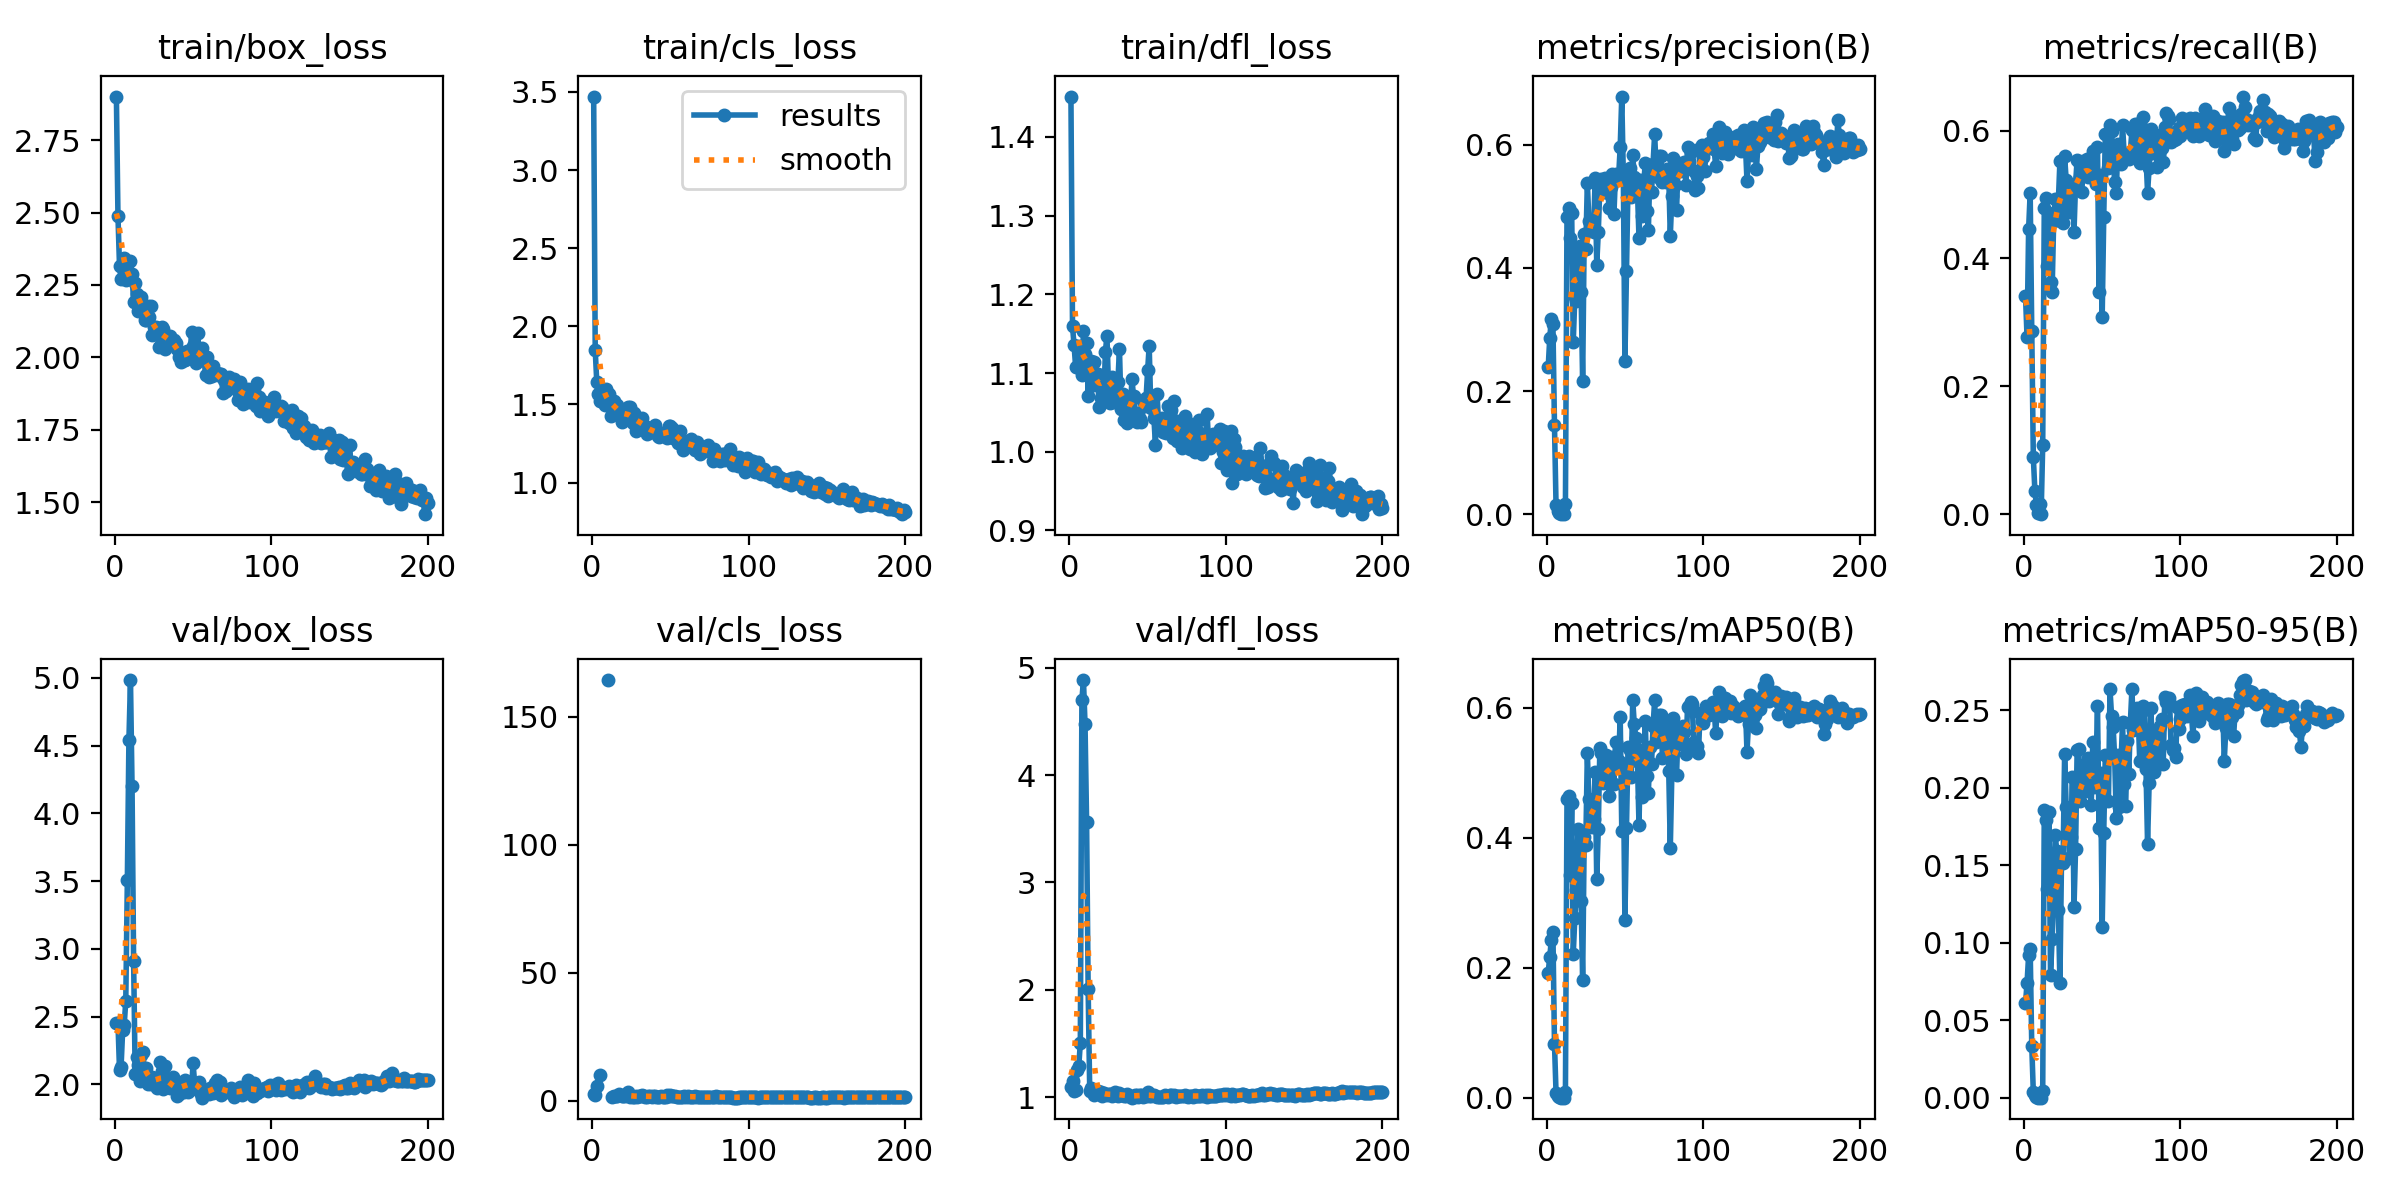

In [12]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/AM_BoundingBox-25/data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1602.0±254.6 MB/s, size: 40.9 KB)
val: Scanning /content/AM_BoundingBox-25/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.40s/it]
                   all         31       1410      0.627      0.655      0.642       0.27
Speed: 0.4ms preprocess, 36.7ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/AM_BoundingBox-25/test/images

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/21 /content/AM_BoundingBox-25/test/images/03b55942-2_2_png.rf.d721f222016b28d9816d50c8ab0d4cd3.jpg: 768x768 41 defs, 47.7ms
image 2/21 /content/AM_BoundingBox-25/test/images/18a9bd68-6_95_png.rf.deee8ae7b93641b3a06e4fe3c98e7a01.jpg: 768x768 22 defs, 47.7ms
image 3/21 /content/AM_BoundingBox-25/test/images/5350952f-3_11_png.rf.a2b986bada8b9133f9254f8e18515e45.jpg: 768x768 81 defs, 47.8ms
image 4/21 /content/AM_BoundingBox-25/test/images/549e3e20-6_91_png.rf.fff6fce93929c24a5a8bc1051763a10d.jpg: 768x768 22 defs, 47.7ms
image 5/21 /content/AM_BoundingBox-25/test/images/565c696e-5_11_png.rf.9cb5665c98493e422a676294b62796aa.jpg: 768x768 45 defs, 47.7ms
image 6/21 /content/AM_BoundingBox-25/test/images/59298473-3_2_png.rf.572e0f5490d3c9315a5844ff1ab25d2e.jpg: 768x768 2 defs, 36.6ms
image 7/21 /content/AM_BoundingBox-25/t

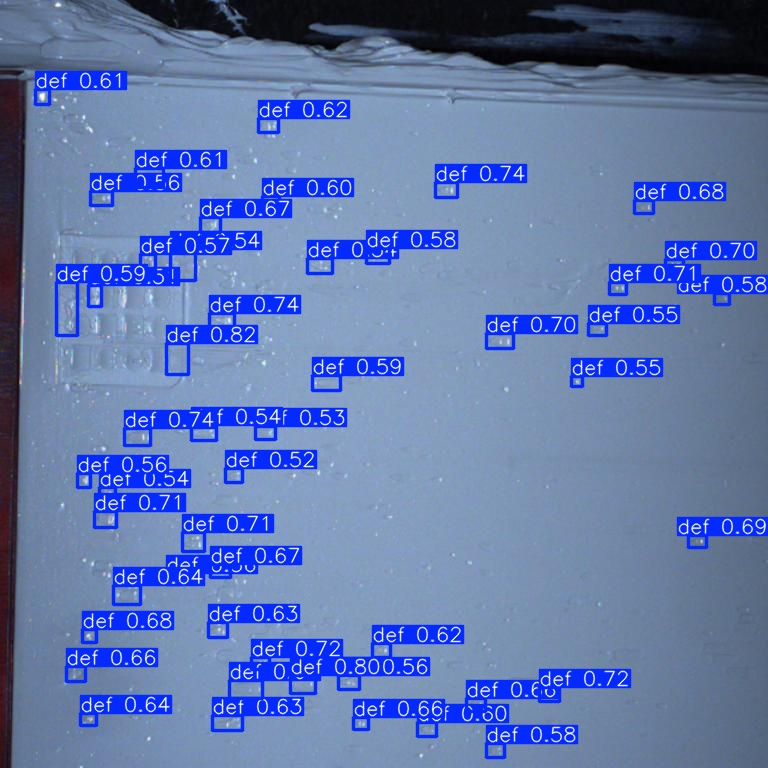

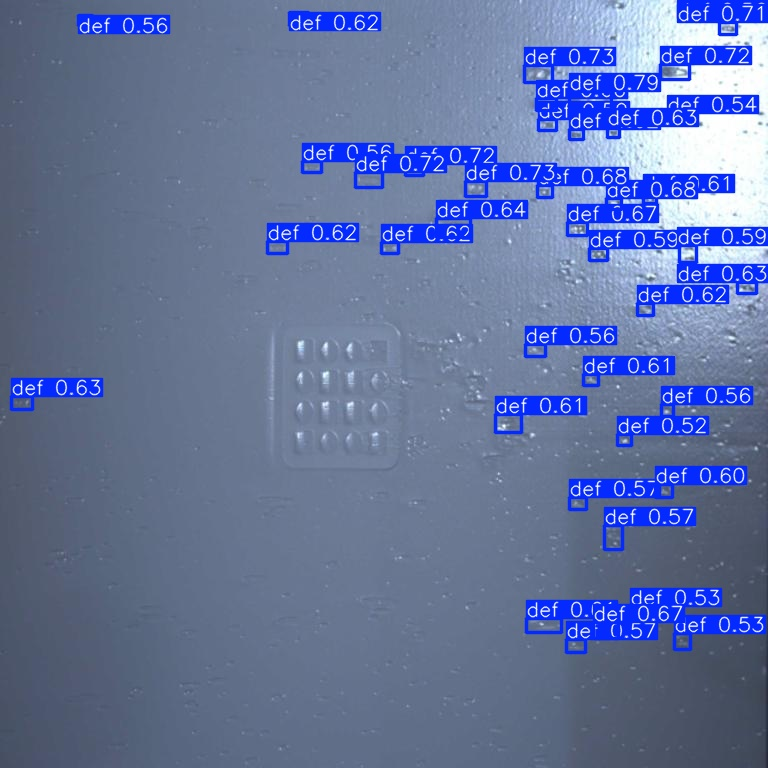

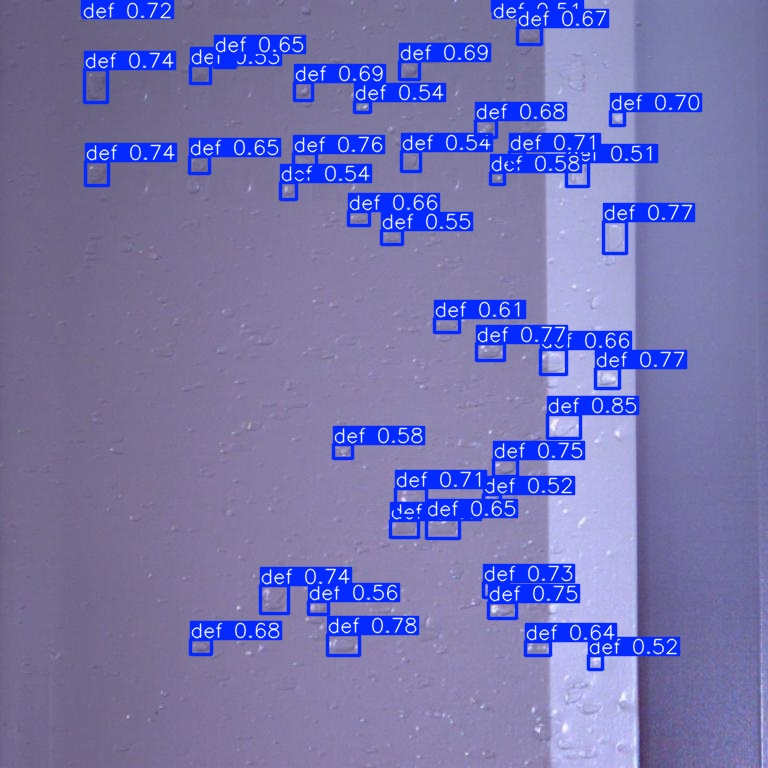

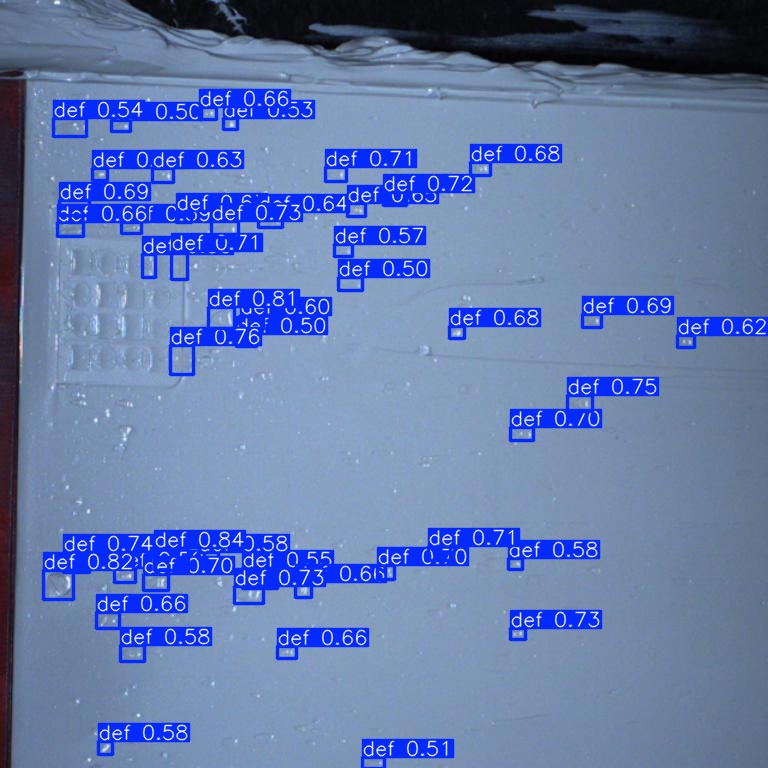

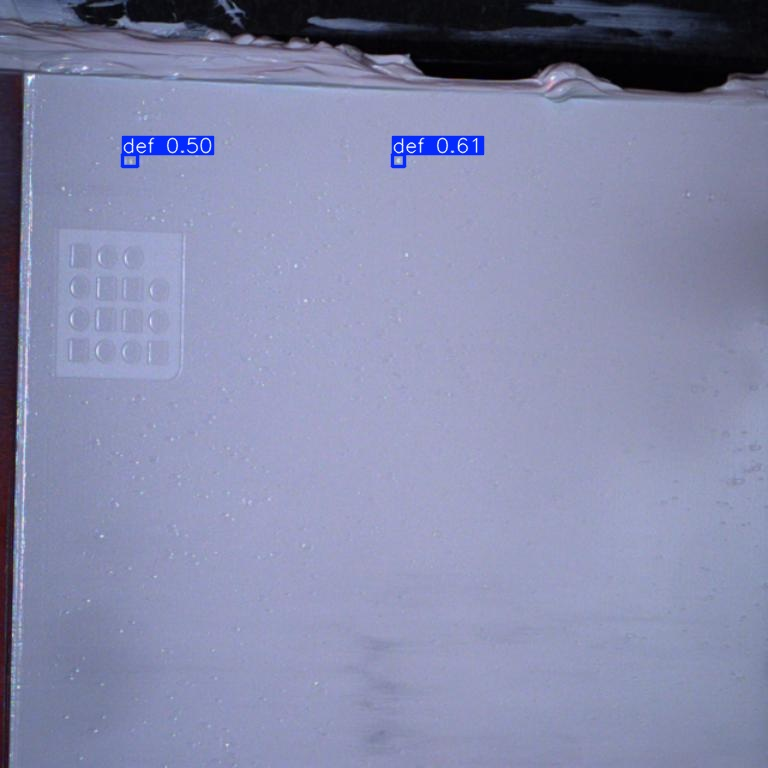

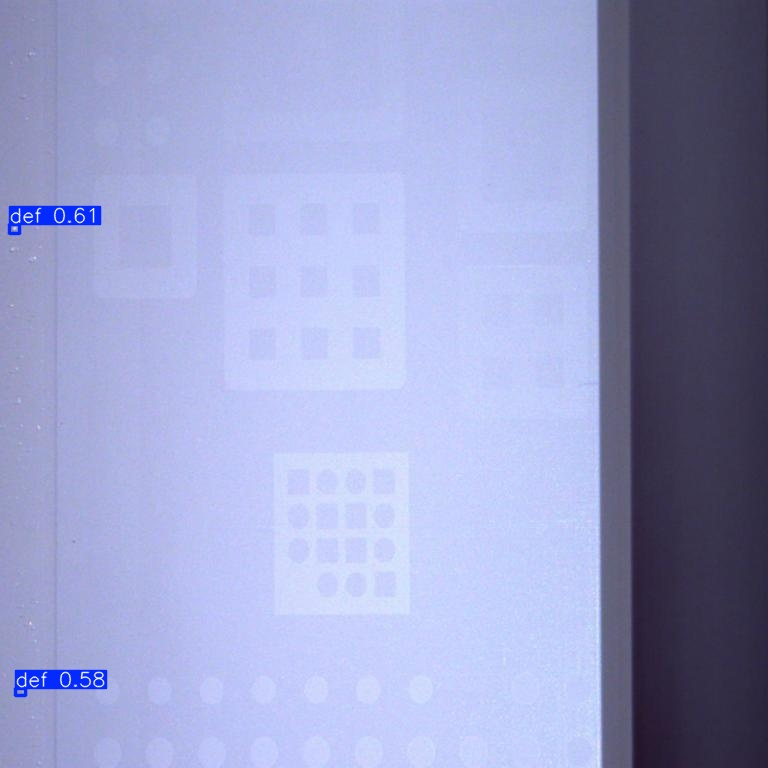

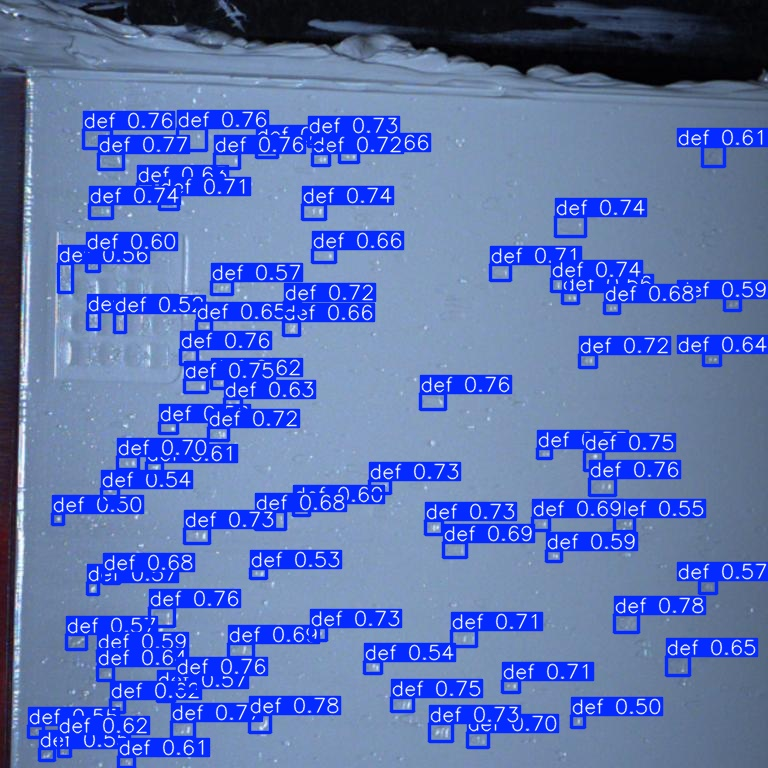

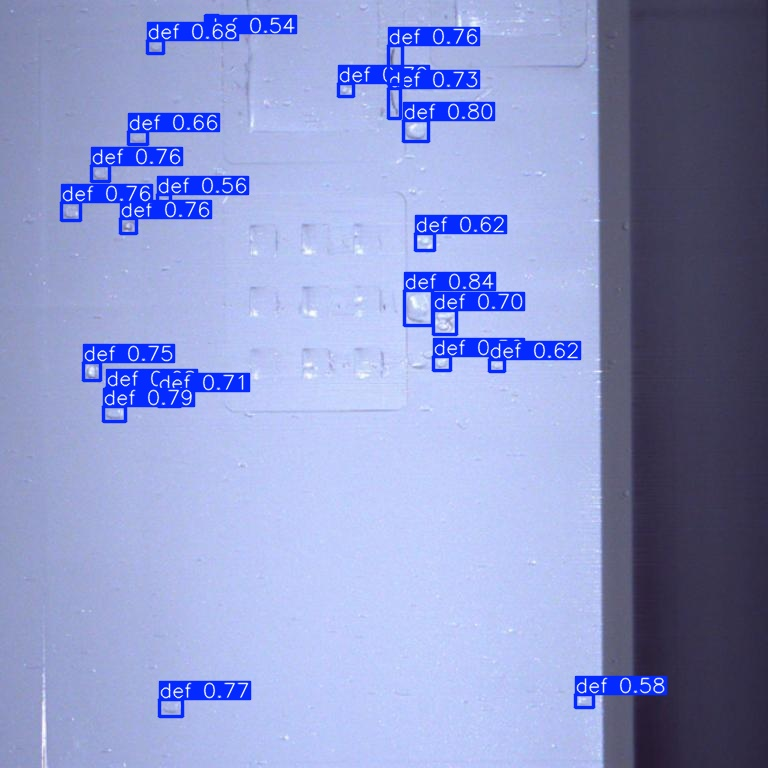

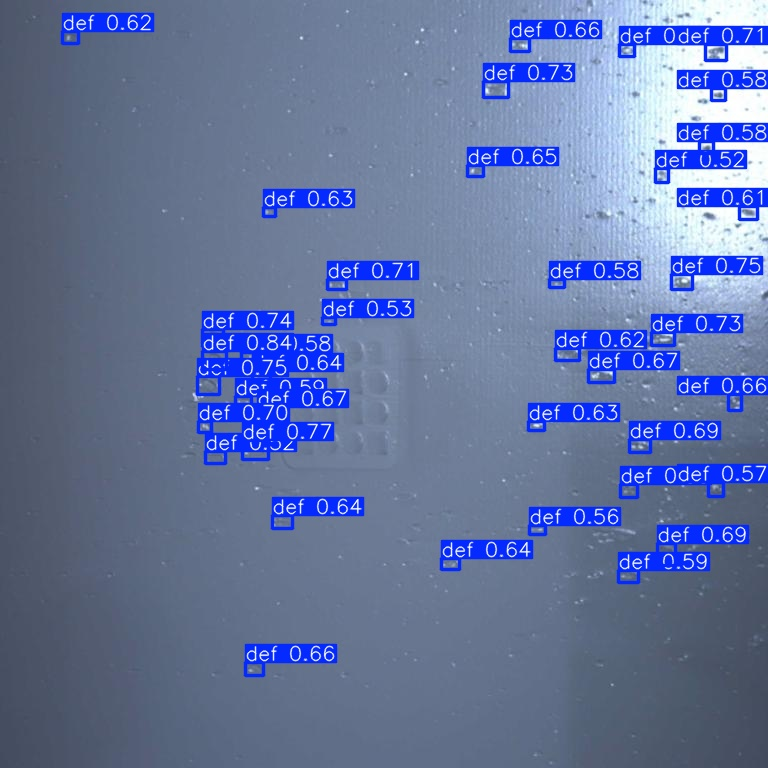

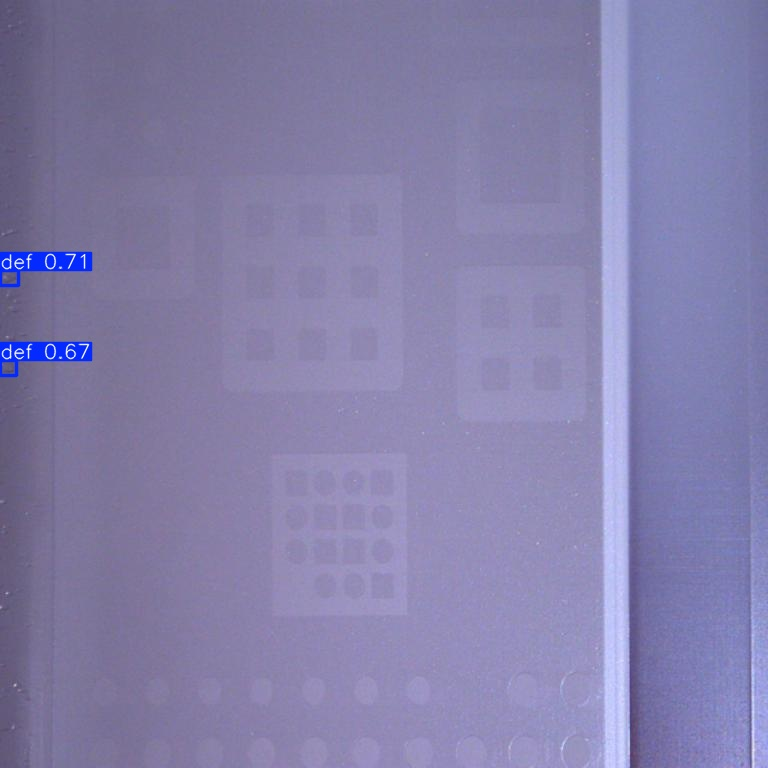

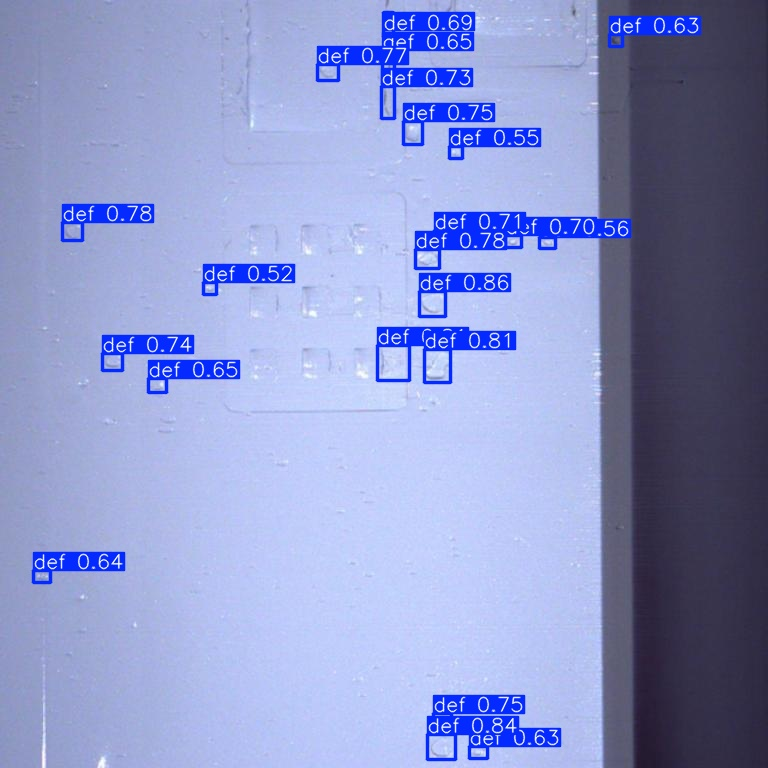

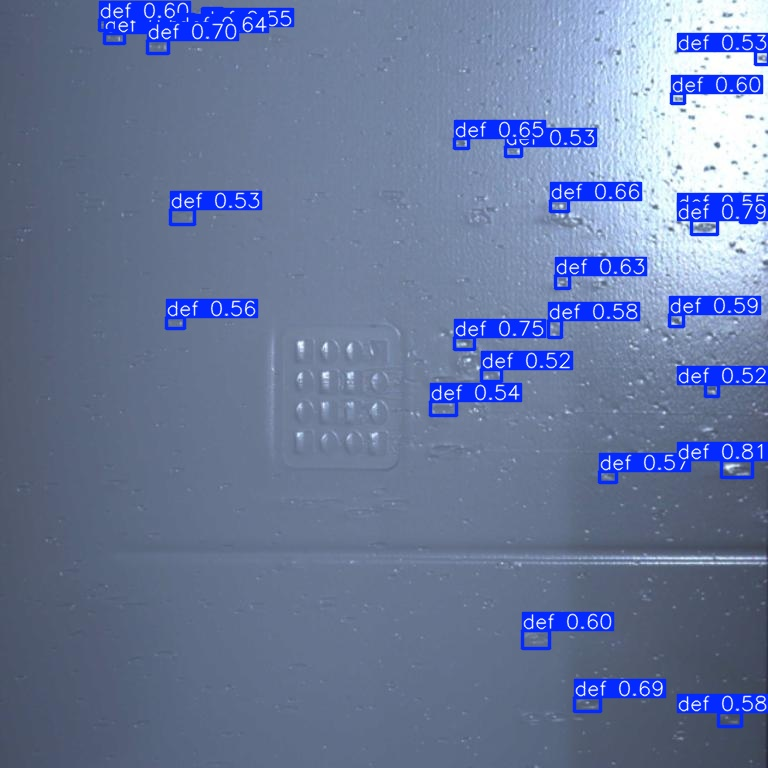

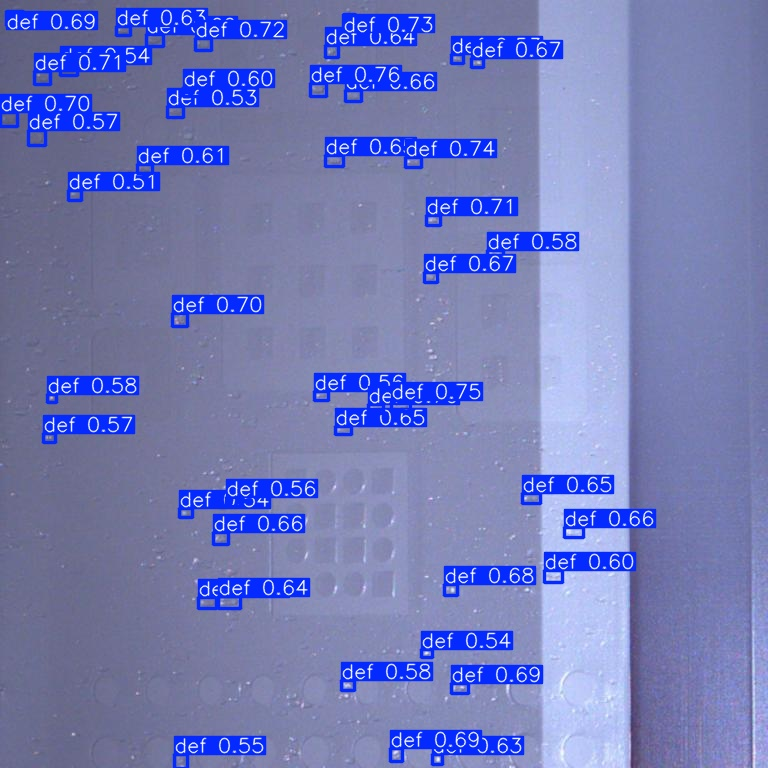

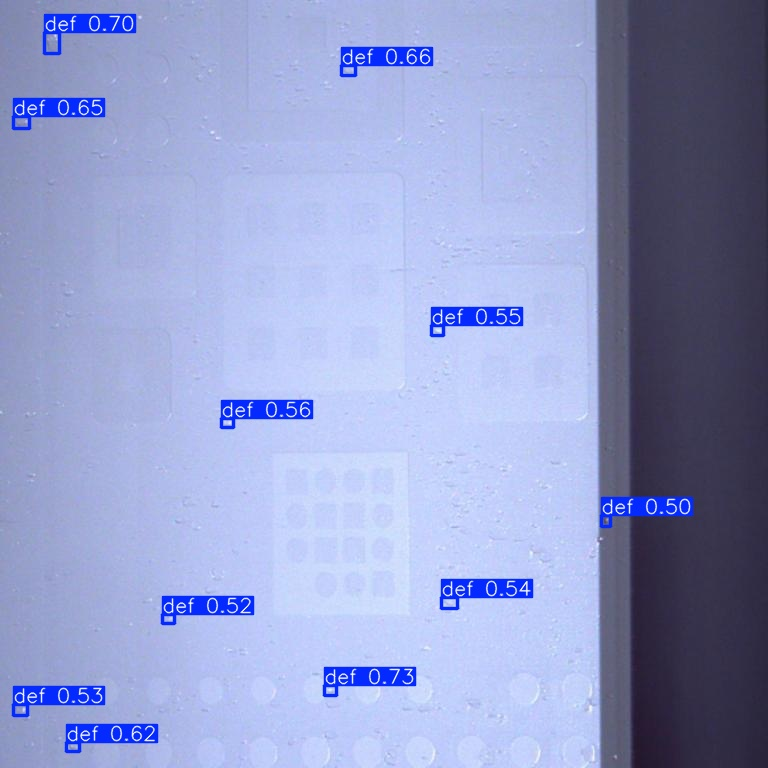

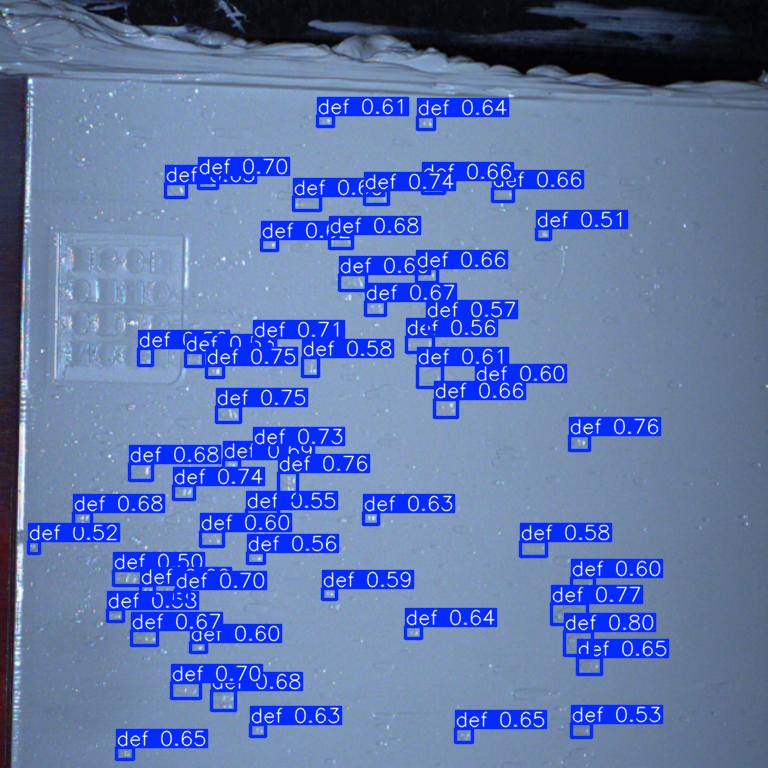

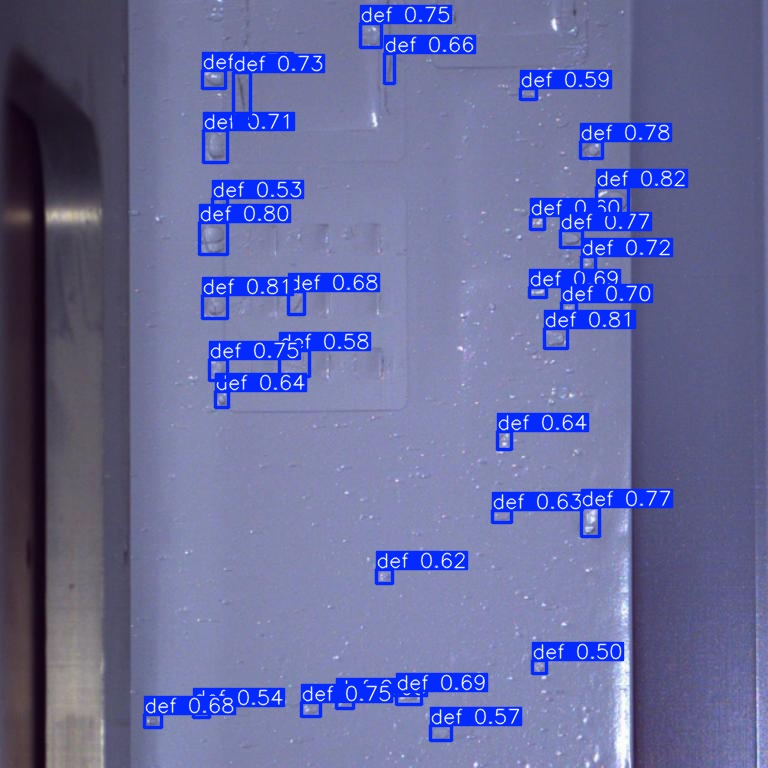

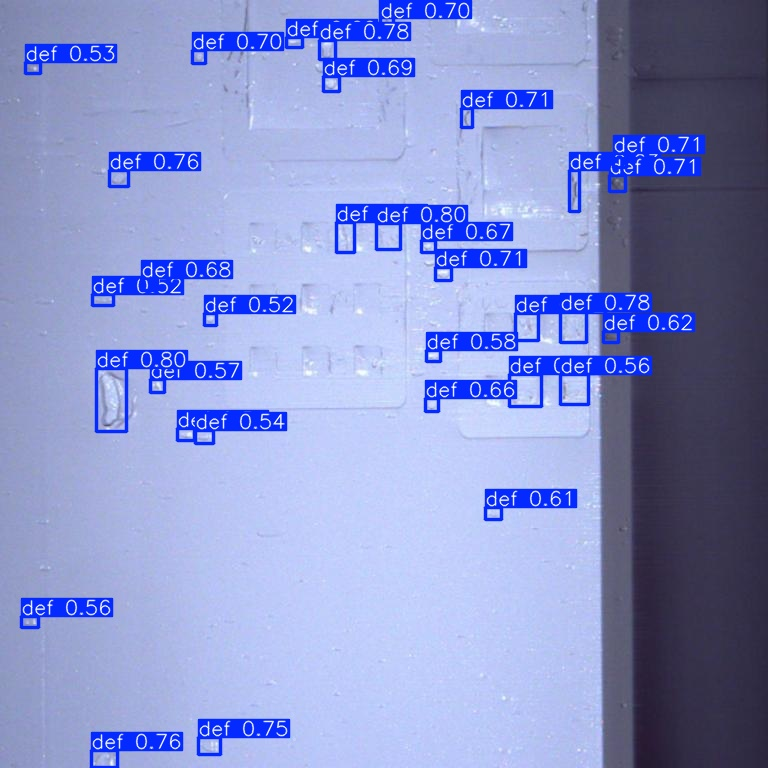

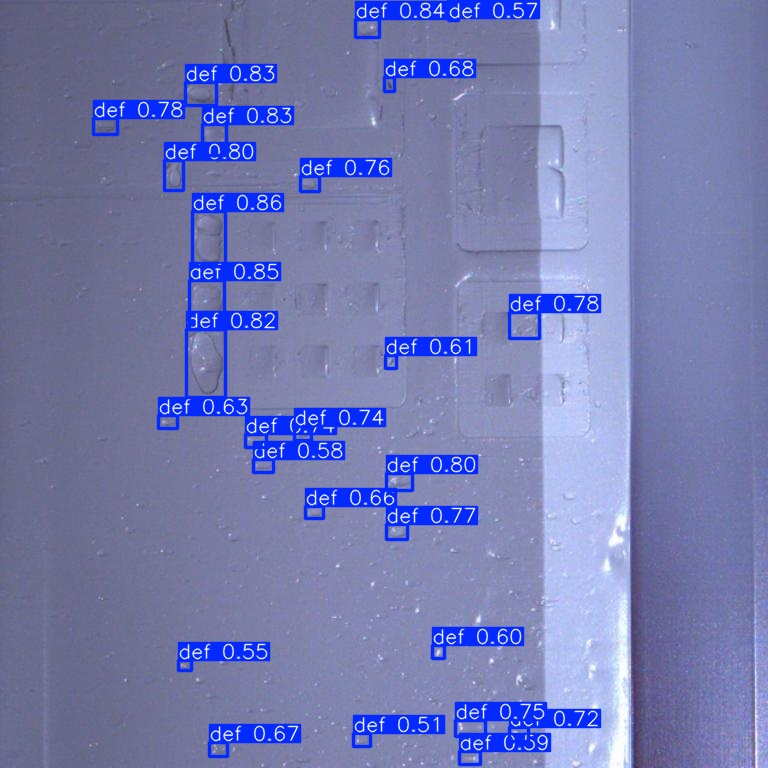

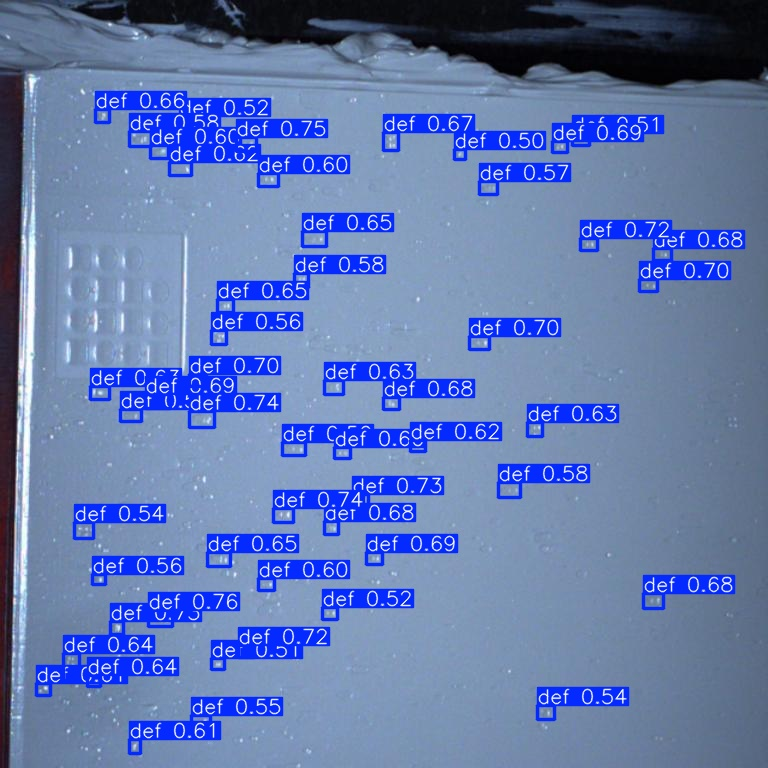

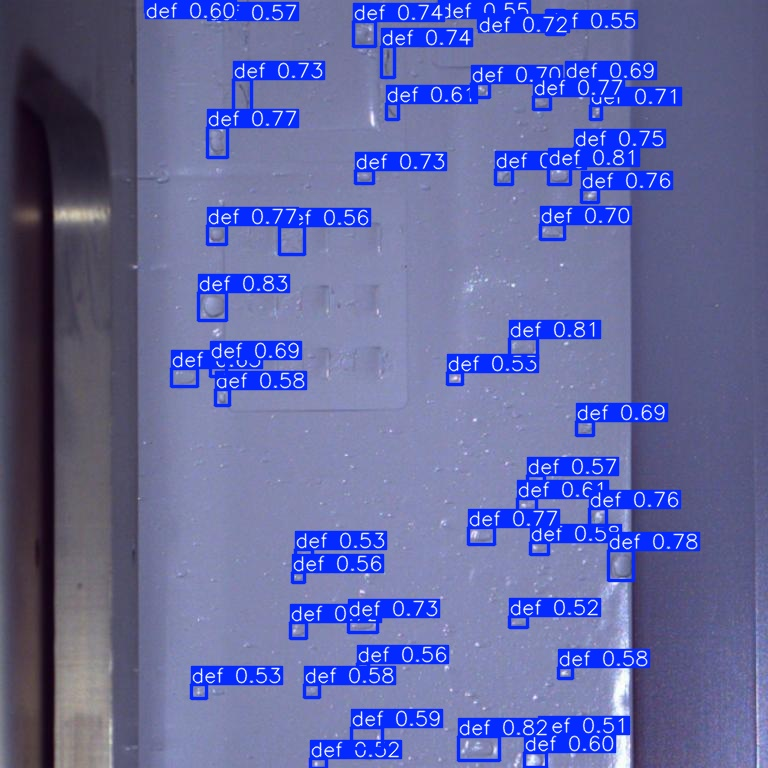

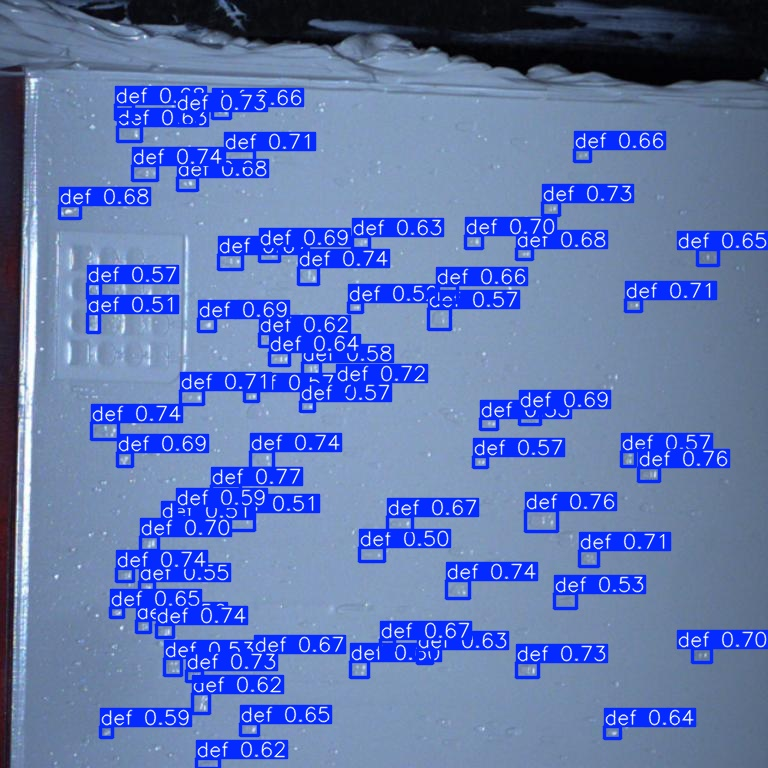

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path, width=600))
    print("\n")